<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING

## Engenharia de Software

### Jessica Witzler Costacurta | rm99068
### Marcio Hitoshi Tahyra | rm552511
### Camilly Breitbach Ishida | rm551474

# Análise dos dados de óbitos por COVID em 2024

## **Importando e instalando as bibliotecas**

**Instalando Vega Datasets, utilizando o pip install**

In [ ]:
!pip install vega_datasets

**Importando datasets disponíveis**

In [ ]:
from vega_datasets import data

**Instalando a biblioteca hvplot do projeto HoloViews**

In [ ]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 4.8 MB/s eta 0:00:00


**Importando o hvplot, seaborn, matplotlib, numpy e sklearn**

In [ ]:
import hvplot.pandas
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## **Obtendo o dataset e analisando os gráficos**

**Obtendo o dataset que iremos utilizar**

In [ ]:
obitos = pd.read_csv('obitos-2024.csv')
obitos1 = pd.read_csv('obitos.csv')

Realiza a leitura de dois arquivos CSV contendo dados dos datasets.

**Vendo 5 exemplos de valores na tabela**

In [ ]:
obitos.sample(5)

uf    tipo_doenca  local_obito faixa_etaria sexo  total
11854  MA         OUTRAS     HOSPITAL        > 100    F     24
7943   MA  INDETERMINADA    DOMICILIO      70 - 79    M     14
7061   RJ  INDETERMINADA     HOSPITAL      60 - 69    F     19
5708   RJ      PNEUMONIA  VIA_PUBLICA      50 - 59    M      2
4790   AC  INDETERMINADA  VIA_PUBLICA      50 - 59    M      1

Seleção de 5 exemplos da dados da tabela.

**Vendo informações das variáveis**

In [ ]:
obitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13007 entries, 0 to 13006
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            13007 non-null  object
 1   tipo_doenca   13007 non-null  object
 2   local_obito   13007 non-null  object
 3   faixa_etaria  13007 non-null  object
 4   sexo          13007 non-null  object
 5   total         13007 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 609.8+ KB


Informações das variáveis. Temos 5 variáveis que estão sendo colocadas como object, ou seja, são variáveis categóricas. E a última que é o total de óbitos, é uma variável inteira (int64).

## **Transformando os valores que são object em int**

**Transformando a variável UF**

In [ ]:
valores_unicos = obitos['uf'].unique()

# Valores únicos
print(valores_unicos)

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


In [ ]:
valores_unicos = obitos['uf'].unique()

# Mapeia os valores únicos para inteiros usando pd.factorize()
obitos['uf_int'], mapping = pd.factorize(obitos['uf'])

obitos.to_csv('obitos.csv', index=False)

Criando uma outra coluna para estipularmos números a variável que é categórica.

**Transformando a variável tipo_doenca**

In [ ]:
valores_unicos = obitos['tipo_doenca'].unique()

# Valores únicos
print(valores_unicos)

['OUTRAS' 'COVID' 'INDETERMINADA' 'INSUFICIENCIA_RESPIRATORIA' 'PNEUMONIA'
 'SEPTICEMIA' 'SRAG']


In [ ]:
valores_unicos = obitos['tipo_doenca'].unique()

# Mapeia os valores únicos para inteiros usando pd.factorize()
obitos['tipo_doenca_int'], mapping = pd.factorize(obitos['tipo_doenca'])

obitos.to_csv('obitos.csv', index=False)

Criando uma outra coluna para estipularmos números a variável que é categórica.

**Transformando a variável local_obito**

In [ ]:
valores_unicos = obitos['local_obito'].unique()

# Valores únicos
print(valores_unicos)

['DOMICILIO' 'HOSPITAL' 'OUTRO' 'OUTROS_SERVICOS_SAUDE' 'VIA_PUBLICA'
 'IGNORADO' 'POSTO_SAUDE' 'AMBULANCIA' 'SAMU']


In [ ]:
valores_unicos = obitos['local_obito'].unique()

# Mapeia os valores únicos para inteiros usando pd.factorize()
obitos['local_obito_int'], mapping = pd.factorize(obitos['local_obito'])

obitos.to_csv('obitos.csv', index=False)

Criando uma outra coluna para estipularmos números a variável que é categórica.

**Transformando a variável faixa_etaria**

In [ ]:
valores_unicos = obitos['faixa_etaria'].unique()

# Valores únicos
print(valores_unicos)

['< 9' '10 - 19' '20 - 29' '30 - 39' '40 - 49' '50 - 59' '60 - 69'
 '70 - 79' '80 - 89' '90 - 99' '> 100' 'N/I']


In [ ]:
valores_unicos = obitos['faixa_etaria'].unique()

# Mapeia os valores únicos para inteiros usando pd.factorize()
obitos['faixa_etaria_int'], mapping = pd.factorize(obitos['faixa_etaria'])

obitos.to_csv('obitos.csv', index=False)

Criando uma outra coluna para estipularmos números a variável que é categórica.

**Transformando a variável sexo**

In [ ]:
valores_unicos = obitos['sexo'].unique()

# Valores únicos
print(valores_unicos)

['F' 'M' 'I']


In [ ]:
valores_unicos = obitos['sexo'].unique()

# Mapeia os valores únicos para inteiros usando pd.factorize()
obitos['sexo_int'], mapping = pd.factorize(obitos['sexo'])

obitos.to_csv('obitos.csv', index=False)

Criando uma outra coluna para estipularmos números a variável que é categórica.

**Analisando como ficou o dataset**

In [ ]:
obitos1.head()

uf tipo_doenca local_obito faixa_etaria sexo  total  uf_int  \
0  AC      OUTRAS   DOMICILIO          < 9    F      7       0   
1  AC      OUTRAS   DOMICILIO          < 9    M     10       0   
2  AC      OUTRAS    HOSPITAL          < 9    F     39       0   
3  AC      OUTRAS    HOSPITAL          < 9    I      1       0   
4  AC      OUTRAS    HOSPITAL          < 9    M     55       0   

   tipo_doenca_int  local_obito_int  faixa_etaria_int  sexo_int  
0                0                0                 0         0  
1                0                0                 0         1  
2                0                1                 0         0  
3                0                1                 0         2  
4                0                1                 0         1

Analisamos o topo da tabela para saber se as colunas criadas foram colocadas na tabela.

**Buscando a descrição das variáveis**

In [ ]:
obitos1.describe()

total        uf_int  tipo_doenca_int  local_obito_int  \
count  13007.000000  13007.000000     13007.000000     13007.000000   
mean      82.077650     13.293611         2.625817         1.974552   
std      378.461487      7.495376         2.008092         1.695046   
min        1.000000      0.000000         0.000000         0.000000   
25%        2.000000      7.000000         0.000000         1.000000   
50%        5.000000     13.000000         3.000000         1.000000   
75%       30.000000     19.000000         4.000000         3.000000   
max    10566.000000     26.000000         6.000000         8.000000   

       faixa_etaria_int      sexo_int  
count      13007.000000  13007.000000  
mean           5.583148      0.560314  
std            3.106939      0.546362  
min            0.000000      0.000000  
25%            3.000000      0.000000  
50%            6.000000      1.000000  
75%            8.000000      1.000000  
max           11.000000      2.000000

Pedimos a descrição de cada uma das variáveis. Ele só fez a análise das colunas que são consideradas numéricas.

## **HVPLOT**

**Exploração dos dados de forma interativa utilizando o HVPLOT**

In [ ]:
obitos24 = obitos1.hvplot.explorer()
obitos24

hvDataFrameExplorer(advanced=Advanced(explorer=..., name='Advanced59047', opts=None), axes=Axes(explorer=..., height=None, legend='bottom_right', logx=False, logy=False, name='Axes59041', responsive=True, shared_axes=True, width=None, xlim=None, ylim=None), by=[], code="df.hvplot(\n    kind='scatter',\n    x='index',\n    legend='bottom_right',\n    widget_location='bottom',\n)", colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping59042', rescale_discrete_levels=True, symmetric=False), geographic=Geographic(crs=None, crs_kwargs={}, explorer=..., feature_scale='110m', features=None, geo=False, global_extent=None, name='Geographic59044', project=False, projection=None, projection_kwargs={}, tiles=None), groupby=[], kind='scatter', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels59043', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer59019', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations59045', rasterize=False, x_sampling=None, y_sampling=None), statusbar=StatusBar(live_update=True, name='StatusBar59034'), style=Style(alpha=1, explorer=..., name='Style59046'), x='index', y='uf', y_multi=[], z=None)

Criamos uma interface interativa de visualização e exploração dos dados do dataset.

**Total de óbitos em relação com faixa etária e sexo**

In [108]:
obitos1.hvplot(
    by=['sexo'],
    kind='bar',
    x='faixa_etaria',
    y=['total'],
    legend='bottom_right',
    widget_location='bottom',
)

HoloViews(Bars, height=300, sizing_mode='fixed', widget_location='bottom', width=700)

Gráfico indicando o total de óbitos por grupos de faixa etária e sexo, por exemplo para homens (M / vermelho) na faixa de 70-79 anos houve um maior número de óbitos.

**Total de óbitos em relação a faixa etária e tipo de doença**

In [109]:
obitos1.hvplot(
    by=['tipo_doenca'],
    colorbar=True,
    groupby=['faixa_etaria'],
    kind='bar',
    x='faixa_etaria_int',
    y=['total'],
    legend='bottom_right',
    widget_location='bottom',
)

Column
    [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', widget_location='bottom', width=700)
    [1] WidgetBox(align=('center', 'end'))
        [0] Select(name='faixa_etaria', options=['< 9', '10 - 19', ...], value='< 9')

Gráfico representando o total de óbitos referentes a cada doença, agrupados por faixa etária.

**Total de óbitos por faixa etária**

In [110]:
obitos1.hvplot(
    by=['sexo'],
    colorbar=True,
    groupby=['uf'],
    kind='bivariate',
    x='faixa_etaria_int',
    y='total',
    legend='bottom_right',
    widget_location='bottom',
)

Column
    [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', widget_location='bottom', width=700)
    [1] WidgetBox(align=('center', 'end'))
        [0] Select(name='uf', options=['AC', 'AL', 'AM', ...], value='AC')

Este gráfico de contorno mostra a distribuição dos óbitos em São Paulo (UF: SP).

Podemos ver um número de mortes maior na faixa de 60 - 80 anos em SP. Esse comportamento é consistente com padrões esperados em grandes centros urbanos com uma população mais envelhecida, como São Paulo, onde há um número significativo de pessoas em faixas etárias mais altas.

**Regressão Linear**

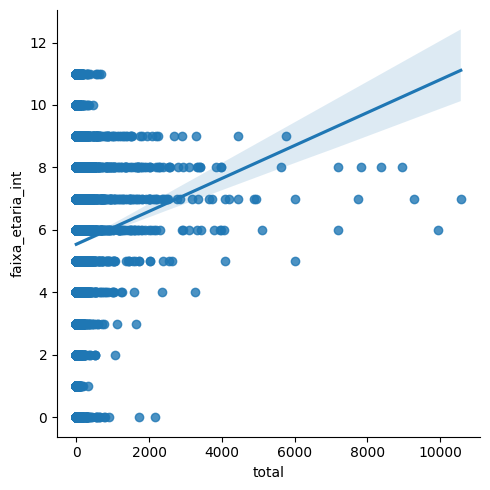

In [112]:
sns.lmplot(x="total",
           y="faixa_etaria_int",
           data=obitos1);

Este gráfico mostra a relação entre a faixa etária e o número total de óbitos.

*O que ele mostra:*

*  **Pontos azuis:** Cada ponto representa o número de óbitos em uma determinada faixa etária.

*  **Linha azul:** Mostra a tendência geral — conforme as pessoas envelhecem (faixa etária mais alta), o número de óbitos tende a aumentar.

*  **Área sombreada:** Indica a margem de erro, ou seja, quanto os números podem variar.


À medida que a idade aumenta, o número de óbitos também tende a ser maior, mas essa relação tem uma variação maior em idades mais avançadas.

## **Utilização do Pandas Profilling**

**Instalação da LIB**

In [ ]:
!conda install install ydata-profiling -y
!pip install --upgrade ydata-profiling

/bin/bash: line 1: conda: command not found
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ada269710f6345a0f32bb499a19ef316d94e6e0389fc98d9e49febde4d94eedc
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Instalamos a Lib para gerar o relatório.

**Gerando relatório para arquivo HTML**

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(obitos1, title="Relatório de Obitos - COVID 2024")
profile.to_file("obitos_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!ls *.html

obitos_report.html


Geramos o relatório e avaliamos se o html criado estava sendo encontrado.

**Utilizando o Jupyter Notebook para renderizar o código HTML diretamente na célula do notebook**

In [ ]:
import webbrowser
import os

file_path = 'obitos_report.html'

with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Exibe o conteúdo HTML no Jupyter Notebook
from IPython.core.display import display, HTML
display(HTML(html_content))

Renderizamos o código HTML diretamente no notebook.